In [205]:
import os
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [206]:
data = pd.read_csv("G:\\UC masters\\University Project\\DATA_601_Biosecurity_Final_Submission\\Stream_1_Analysis_Outputs_Codes\\08_Final Datasets\\Master_Dataset.csv")


In [207]:
data= data.rename(columns={'Original species name': 'original_species_name'})

In [208]:
data['original_species_name'].nunique()

1500

In [210]:
columns = ['original_species_name','Exotic_Order', 'Exotic_Family','Exotic_Year','Exotic_Region',
           'Exotic_Ecozone','Exotic_Current Distribution Cosmopolitan?',
           'Exotic_Feeding Main','Present_in_GBIF','size_mm',
           'Manual_Colour', 'Manual_Wings', 'Manualong_Shape']

In [211]:
data_selected_cols = data[columns]

In [212]:
data_selected_cols.drop_duplicates(keep='first',inplace=True)

C:\Users\singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [213]:
data_selected_cols = data_selected_cols.reset_index()


In [214]:
data_selected_cols.drop('index', axis= 1, inplace= True)

[Text(0, 0, 'Hemiptera'),
 Text(0, 0, 'Coleoptera'),
 Text(0, 0, 'Lepidoptera'),
 Text(0, 0, 'Hymenoptera'),
 Text(0, 0, 'Diptera'),
 Text(0, 0, 'Thysanoptera'),
 Text(0, 0, 'Phthiraptera'),
 Text(0, 0, 'Psocoptera'),
 Text(0, 0, 'Blattodea'),
 Text(0, 0, 'Orthoptera'),
 Text(0, 0, 'Dermaptera'),
 Text(0, 0, 'Siphonaptera'),
 Text(0, 0, 'Isoptera'),
 Text(0, 0, 'Odonata'),
 Text(0, 0, 'Mantodea'),
 Text(0, 0, 'Neuroptera')]

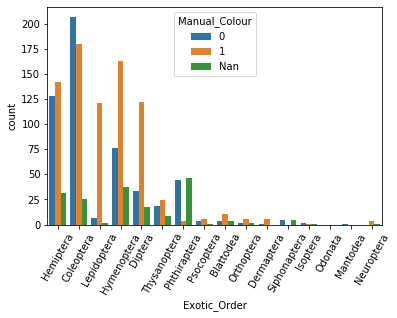

In [215]:
g= sns.countplot(x = 'Exotic_Order',hue='Manual_Colour',data=data_selected_cols)
g.set_xticklabels(g.get_xticklabels(),rotation=60)

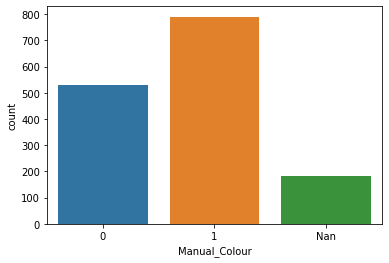

In [216]:
sns.countplot(data_selected_cols.Manual_Colour)

In [217]:
exotic_data = pd.crosstab(columns=data_selected_cols.Present_in_GBIF,
                          index=[data_selected_cols.Exotic_Order,
                                 data_selected_cols.Manualong_Shape,
                                 data_selected_cols.Manual_Colour,
                                   data_selected_cols.Manual_Wings
                                 
                                
                                ],
                          margins=True)

In [218]:
exotic_data['no_photo_ratio']= exotic_data.No/exotic_data.All
exotic_data['has_photo_ratio'] = exotic_data.Yes/exotic_data.All

In [219]:
exotic_data['variance'] = np.sqrt(exotic_data.All * exotic_data.no_photo_ratio *exotic_data.has_photo_ratio)

In [220]:
exotic_data[exotic_data.variance > 1.7]

Present_in_GBIF                                            No  Yes   All  \
Exotic_Order Manualong_Shape Manual_Colour Manual_Wings                    
Coleoptera   long            0             1               50   16    66   
                             1             1               45   23    68   
             oval            0             1               80   22   102   
                             1             1               45   27    72   
Diptera      long            1             1               37   18    55   
             triangular      1             1               45   19    64   
Hemiptera    long            0             1               18    7    25   
                             1             1               33   23    56   
             oval            0             0               37    8    45   
                                           1               37    5    42   
                             1             0               21    9    30   
                                           1               26   14    40   
Hymenoptera  long            0             0               14   10    24   
                                           1               41    8    49   
                             1             0               14    6    20   
                                           1               99   25   124   
             triangular      1             1                6    8    14   
Lepidoptera  long            1             1               15   15    30   
             triangular      1             1               42   49    91   
All                                                      1131  371  1502   

Present_in_GBIF                                          no_photo_ratio  \
Exotic_Order Manualong_Shape Manual_Colour Manual_Wings                   
Coleoptera   long            0             1                   0.757576   
                             1             1                   0.661765   
             oval            0             1                   0.784314   
                             1             1                   0.625000   
Diptera      long            1             1                   0.672727   
             triangular      1             1                   0.703125   
Hemiptera    long            0             1                   0.720000   
                             1             1                   0.589286   
             oval            0             0                   0.822222   
                                           1                   0.880952   
                             1             0                   0.700000   
                                           1                   0.650000   
Hymenoptera  long            0             0                   0.583333   
                                           1                   0.836735   
                             1             0                   0.700000   
                                           1                   0.798387   
             triangular      1             1                   0.428571   
Lepidoptera  long            1             1                   0.500000   
             triangular      1             1                   0.461538   
All                                                            0.752996   

Present_in_GBIF                                          has_photo_ratio  \
Exotic_Order Manualong_Shape Manual_Colour Manual_Wings                    
Coleoptera   long            0             1                    0.242424   
                             1             1                    0.338235   
             oval            0             1                    0.215686   
                             1             1                    0.375000   
Diptera      long            1             1                    0.327273   
             triangular      1             1                    0.296875   
Hemiptera    long            0             1                    0.28

In [16]:
#data = data.merge(manual_color, on='original_species_name',how='left')

[Text(0, 0, 'Hemiptera'),
 Text(0, 0, 'Coleoptera'),
 Text(0, 0, 'Lepidoptera'),
 Text(0, 0, 'Hymenoptera'),
 Text(0, 0, 'Diptera'),
 Text(0, 0, 'Thysanoptera'),
 Text(0, 0, 'Phthiraptera'),
 Text(0, 0, 'Psocoptera'),
 Text(0, 0, 'Blattodea'),
 Text(0, 0, 'Orthoptera'),
 Text(0, 0, 'Dermaptera'),
 Text(0, 0, 'Siphonaptera'),
 Text(0, 0, 'Isoptera'),
 Text(0, 0, 'Odonata'),
 Text(0, 0, 'Mantodea'),
 Text(0, 0, 'Neuroptera')]

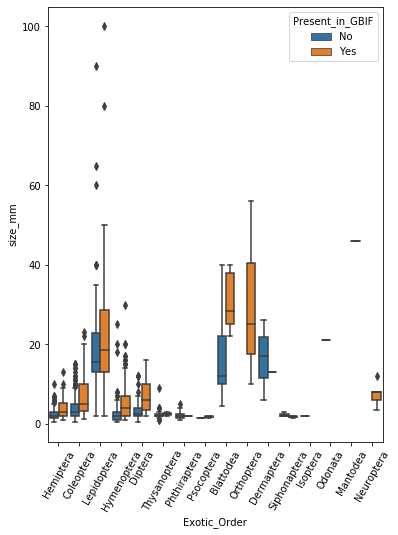

In [25]:
fig, ax = plt.subplots(figsize=(6,8))
g = sns.boxplot(ax = ax, x="Exotic_Order", y="size_mm", hue="Present_in_GBIF",data=data_selected_cols)
g.set_xticklabels(g.get_xticklabels(),rotation=60)

[Text(0, 0, 'Nelson- Tasman'),
 Text(0, 0, 'Bay of Plenty'),
 Text(0, 0, 'Auckland'),
 Text(0, 0, 'Canterbury'),
 Text(0, 0, 'Northland'),
 Text(0, 0, 'West Coast'),
 Text(0, 0, 'Wellington'),
 Text(0, 0, 'Manawatu-Wanganui'),
 Text(0, 0, 'Gisborne'),
 Text(0, 0, "Hawke's Bay"),
 Text(0, 0, 'Southland'),
 Text(0, 0, 'Waikato'),
 Text(0, 0, 'Otago'),
 Text(0, 0, 'Marlborough'),
 Text(0, 0, 'Taranaki'),
 Text(0, 0, 'Auckland,Waikato')]

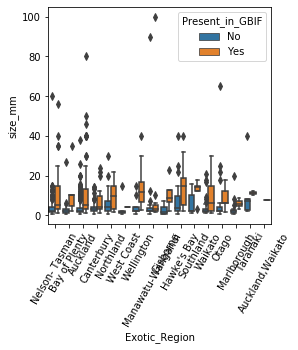

In [52]:
fig, ax= plt.subplots(figsize= (4,4))
g = sns.boxplot(ax= ax, x= 'Exotic_Region', y="size_mm", hue="Present_in_GBIF",data=data_selected_cols)
g.set_xticklabels(g.get_xticklabels(), rotation= 60)

[Text(0, 0, 'Hemiptera'),
 Text(0, 0, 'Coleoptera'),
 Text(0, 0, 'Lepidoptera'),
 Text(0, 0, 'Diptera'),
 Text(0, 0, 'Thysanoptera'),
 Text(0, 0, 'Hymenoptera'),
 Text(0, 0, 'Phthiraptera'),
 Text(0, 0, 'Psocoptera'),
 Text(0, 0, 'Blattodea'),
 Text(0, 0, 'Dermaptera'),
 Text(0, 0, 'Siphonaptera'),
 Text(0, 0, 'Orthoptera'),
 Text(0, 0, 'Isoptera'),
 Text(0, 0, 'Mantodea'),
 Text(0, 0, 'Neuroptera')]

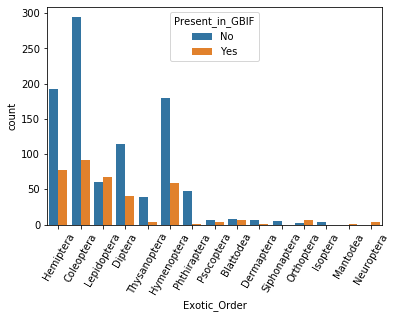

In [198]:
g= sns.countplot(x = 'Exotic_Order',hue='Present_in_GBIF',data=data_selected_cols)
g.set_xticklabels(g.get_xticklabels(),rotation=60)

[Text(0, 0, 'Nelson- Tasman'),
 Text(0, 0, 'Bay of Plenty'),
 Text(0, 0, 'Auckland'),
 Text(0, 0, 'Canterbury'),
 Text(0, 0, 'Northland'),
 Text(0, 0, 'West Coast'),
 Text(0, 0, 'Wellington'),
 Text(0, 0, 'Manawatu-Wanganui'),
 Text(0, 0, 'Gisborne'),
 Text(0, 0, "Hawke's Bay"),
 Text(0, 0, 'Southland'),
 Text(0, 0, 'Waikato'),
 Text(0, 0, 'Otago'),
 Text(0, 0, 'Marlborough'),
 Text(0, 0, 'Taranaki'),
 Text(0, 0, 'Auckland,Waikato')]

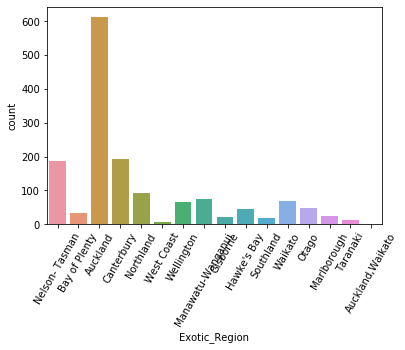

In [87]:
g = sns.countplot(x='Exotic_Region', data= data_selected_cols)
g.set_xticklabels(g.get_xticklabels(), rotation= 60)

In [136]:
data_selected_cols.isnull().sum()

original_species_name                          0
Exotic_Order                                   0
Exotic_Family                                  0
Exotic_Year                                    0
Exotic_Region                                  0
Exotic_Ecozone                                 0
Exotic_Current Distribution Cosmopolitan?      0
Exotic_Feeding Main                            0
Present_in_GBIF                                0
size_mm                                      379
Manual_Colour                                182
Manual_Wings                                 182
Manualong_Shape                              182
dtype: int64

In [133]:
data_selected_cols.columns

Index(['original_species_name', 'Exotic_Order', 'Exotic_Family', 'Exotic_Year',
       'Exotic_Region', 'Exotic_Ecozone',
       'Exotic_Current Distribution Cosmopolitan?', 'Exotic_Feeding Main',
       'Present_in_GBIF', 'size_mm', 'Manual_Colour', 'Manual_Wings',
       'Manualong_Shape'],
      dtype='object')

In [134]:
for i in range(len(data_selected_cols)):
    if data_selected_cols['Manual_Colour'].iloc[i] == 'Nan':
        data_selected_cols['Manual_Colour'].iloc[i] = None
        data_selected_cols['Manual_Wings'].iloc[i] = None
        data_selected_cols['Manualong_Shape'].iloc[i] = None
        

C:\Users\singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [135]:
data_selected_cols['Exotic_Year'] = data_selected_cols['Exotic_Year'].ffill(axis=0)
data_selected_cols['Exotic_Region'] = data_selected_cols['Exotic_Region'].ffill(axis=0)
data_selected_cols['Exotic_Ecozone'] = data_selected_cols['Exotic_Ecozone'].ffill(axis=0)
data_selected_cols['Exotic_Current Distribution Cosmopolitan?'] = data_selected_cols['Exotic_Current Distribution Cosmopolitan?'].ffill(axis=0)
data_selected_cols['Exotic_Feeding Main'] = data_selected_cols['Exotic_Feeding Main'].ffill(axis=0)



In [137]:
data_selected_cols.dropna(subset=['Manual_Colour','Manual_Wings','Manualong_Shape'],inplace=True)

In [138]:
data_selected_cols[data_selected_cols[categorical_columns].isnull().any(axis=1)].count()

original_species_name                        0
Exotic_Order                                 0
Exotic_Family                                0
Exotic_Year                                  0
Exotic_Region                                0
Exotic_Ecozone                               0
Exotic_Current Distribution Cosmopolitan?    0
Exotic_Feeding Main                          0
Present_in_GBIF                              0
size_mm                                      0
Manual_Colour                                0
Manual_Wings                                 0
Manualong_Shape                              0
dtype: int64

In [139]:
data_selected_cols.count()

original_species_name                        1321
Exotic_Order                                 1321
Exotic_Family                                1321
Exotic_Year                                  1321
Exotic_Region                                1321
Exotic_Ecozone                               1321
Exotic_Current Distribution Cosmopolitan?    1321
Exotic_Feeding Main                          1321
Present_in_GBIF                              1321
size_mm                                      1033
Manual_Colour                                1321
Manual_Wings                                 1321
Manualong_Shape                              1321
dtype: int64

C:\Users\singh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\singh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([864., 117.,  25.,  19.,   2.,   2.,   1.,   1.,   1.,   1.]),
 array([  0.5 ,  10.45,  20.4 ,  30.35,  40.3 ,  50.25,  60.2 ,  70.15,
         80.1 ,  90.05, 100.  ]),
 <a list of 10 Patch objects>)

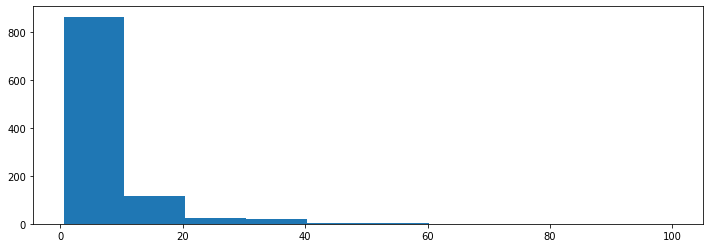

In [140]:
plt.hist(data_selected_cols.size_mm)

In [141]:
median_value = data_selected_cols['size_mm'].median()
data_selected_cols['size_mm'] = data_selected_cols['size_mm'].fillna(median_value)

In [142]:
data_selected_cols['size_mm'] = np.log(data_selected_cols['size_mm'])

In [143]:
categorical_columns = ['Exotic_Order','Exotic_Region','Exotic_Current Distribution Cosmopolitan?',
           'Exotic_Feeding Main',
           'Manual_Colour', 'Manual_Wings', 'Manualong_Shape']

In [144]:
#data_selected_cols['size_mm'] = pd.qcut(data_selected_cols['size_mm'], 3, labels= ('small','medium','high'))

In [145]:
#data_selected_cols.groupby(by = ['size_mm']).agg({'count'})

In [146]:
data_new = data_selected_cols[categorical_columns]

In [147]:
def dummies(df,col):
    df1 = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = df.drop(col, axis=1)
    df = pd.concat([df,df1],axis=1 )
    return df

In [148]:
#data_new = pd.DataFrame()
for i in categorical_columns:
    data_new = dummies(data_new, i)

In [149]:
data_new.head()

,Exotic_Order_Coleoptera,Exotic_Order_Dermaptera,Exotic_Order_Diptera,Exotic_Order_Hemiptera,Exotic_Order_Hymenoptera,Exotic_Order_Isoptera,Exotic_Order_Lepidoptera,Exotic_Order_Mantodea,Exotic_Order_Neuroptera,Exotic_Order_Orthoptera,...,Exotic_Feeding Main_Predator,Exotic_Feeding Main_Saprophagous,Exotic_Feeding Main_Stored Products,Exotic_Feeding Main_Stored products,Exotic_Feeding Main_Strored Products,Manual_Colour_1,Manual_Wings_1,Manualong_Shape_long,Manualong_Shape_oval,Manualong_Shape_triangular
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [150]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
list1 = lb.fit_transform(data_selected_cols.Present_in_GBIF)

In [151]:
data_new['Present_in_GBIF'] = list1

In [152]:
#data_selected_cols['size_mm'].count()

In [153]:
# data_new['size_mm'] = data_selected_cols['size_mm'].count()
# data_new.head()

In [154]:
data_new.columns

Index(['Exotic_Order_Coleoptera', 'Exotic_Order_Dermaptera',
       'Exotic_Order_Diptera', 'Exotic_Order_Hemiptera',
       'Exotic_Order_Hymenoptera', 'Exotic_Order_Isoptera',
       'Exotic_Order_Lepidoptera', 'Exotic_Order_Mantodea',
       'Exotic_Order_Neuroptera', 'Exotic_Order_Orthoptera',
       'Exotic_Order_Phthiraptera', 'Exotic_Order_Psocoptera',
       'Exotic_Order_Siphonaptera', 'Exotic_Order_Thysanoptera',
       'Exotic_Region_Auckland,Waikato', 'Exotic_Region_Bay of Plenty',
       'Exotic_Region_Canterbury', 'Exotic_Region_Gisborne',
       'Exotic_Region_Hawke's Bay', 'Exotic_Region_Manawatu-Wanganui',
       'Exotic_Region_Marlborough', 'Exotic_Region_Nelson- Tasman',
       'Exotic_Region_Northland', 'Exotic_Region_Otago',
       'Exotic_Region_Southland', 'Exotic_Region_Taranaki',
       'Exotic_Region_Waikato', 'Exotic_Region_Wellington',
       'Exotic_Region_West Coast',
       'Exotic_Current Distribution Cosmopolitan?_Yes',
       'Exotic_Current Distributi

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [156]:
train_x, test_x, train_y,test_y = train_test_split(data_new.drop('Present_in_GBIF', axis=1),
                                                   data_new.Present_in_GBIF,
                                                  test_size= 0.25,random_state=5)

# Weighted Random Forest Approach

In [157]:
## Choose all predictors except target & IDcols
#predictors = [x for x in df.columns]
param_test1 = {'n_estimators':[150,250,500,750,1000],
               'class_weight':[{0:1,1:15},{0:1,1:25},{0:1,1:50},{0:1,1:75}]}


gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=10)
gsearch1.fit(train_x,train_y)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [160]:
 gsearch1.best_params_, gsearch1.best_score_

({'class_weight': {0: 1, 1: 15}, 'n_estimators': 250}, 0.6649590067528253)

In [161]:
rf = RandomForestClassifier(n_estimators=150,class_weight={0:1,1:15})

In [162]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 15},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [163]:
y_pred_prob = rf.predict_proba(test_x)


In [164]:
#test_x['test_prob']= y_pred_prob[:,1]

In [165]:
#data_selected_cols.iloc[971]

In [166]:
#test_x[test_x['test_prob']> 0.98]

In [167]:
y_pred = rf.predict(test_x)

In [168]:
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.5280898876404494 0.33098591549295775 0.4069264069264069


In [169]:
print(classification_report(y_pred=y_pred,y_true=test_y))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68       242
           1       0.33      0.53      0.41        89

    accuracy                           0.59       331
   macro avg       0.55      0.57      0.54       331
weighted avg       0.66      0.59      0.61       331



In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

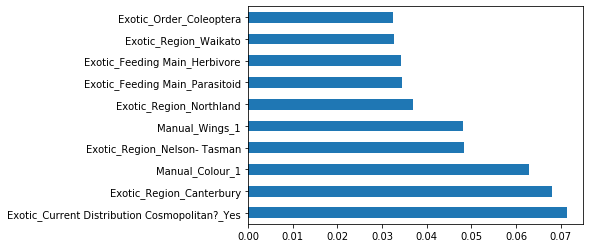

In [171]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [172]:
confusion_matrix(y_pred, test_y)

array([[147,  42],
       [ 95,  47]], dtype=int64)

0.5938805831553533


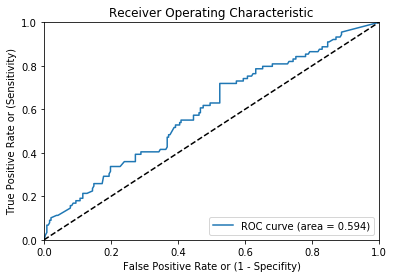

In [173]:
pred_prob = rf.predict_proba(test_x)
fpr, tpr, threshold = metrics.roc_curve(test_y,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

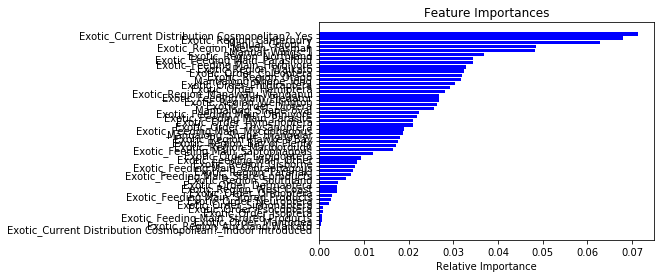

In [176]:
features = data_new.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Balanced Random Forest

When using RandomForestClassifier a useful setting is class_weight=balanced wherein classes are automatically weighted
inversely proportional to how frequently they appear in the data. Specifically:

wj=n/knj
where wj is the weight to class 
j,n is the number of observations, 
nj is the number of observations in class 
j, and k is the total number of classes.

In [177]:
## Choose all predictors except target & IDcols

param_test1 = {'n_estimators':[100,150,250,500,750,1000]}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced'), 
param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=10)
gsearch1.fit(train_x,train_y)

C:\Users\singh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                            

In [179]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 500}, 0.665670331378469)

In [180]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, class_weight='balanced')

In [181]:
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [182]:
y_pred = rf.predict(test_x)

In [183]:
tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.34831460674157305 0.3229166666666667 0.33513513513513515


In [184]:
print(classification_report(y_pred=y_pred, y_true=test_y))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       242
           1       0.32      0.35      0.34        89

    accuracy                           0.63       331
   macro avg       0.54      0.54      0.54       331
weighted avg       0.64      0.63      0.63       331



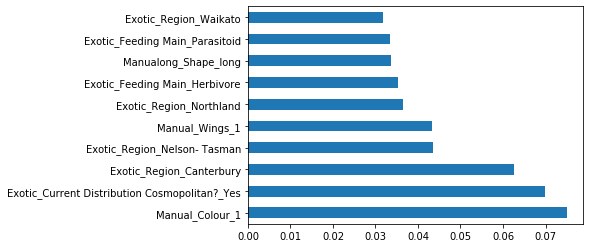

In [185]:
feat_importances = pd.Series(rf.feature_importances_, index=train_x.columns)
feat_importances.nlargest(10).plot(kind='barh')

0.5919073265855697


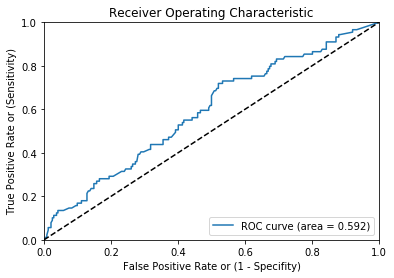

In [186]:
pred_prob = rf.predict_proba(test_x)
fpr, tpr, threshold = metrics.roc_curve(test_y,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [187]:
confusion_matrix(y_pred,test_y)

array([[177,  58],
       [ 65,  31]], dtype=int64)

In [188]:
test_y[test_y==1].count()

89

In [189]:
data_with_no_gbif = data_selected_cols[categorical_columns]

In [190]:
colour_data_multi = data_with_no_gbif[data_with_no_gbif['Manual_Colour'] == '1' ]

#colour_data_multi.drop_duplicates(keep='first', inplace= True)

In [194]:
nelson = data_with_no_gbif[data_with_no_gbif['Exotic_Region']== 'Nelson- Tasman']

In [195]:
data_selected_cols.columns

Index(['original_species_name', 'Exotic_Order', 'Exotic_Family', 'Exotic_Year',
       'Exotic_Region', 'Exotic_Ecozone',
       'Exotic_Current Distribution Cosmopolitan?', 'Exotic_Feeding Main',
       'Present_in_GBIF', 'size_mm', 'Manual_Colour', 'Manual_Wings',
       'Manualong_Shape'],
      dtype='object')

In [196]:
import seaborn as sns